# Apple Company Stock Price
## Prediction And Forecasting Using Stacked LSTM

In [1]:
# Data Collection -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import tensorflow as tf
key="81b21463971e1957d0a32e930569eba31d56bd2a"  
#Take this API Key from TIINGO website after Login - Do not share this key with anyone this is only for you.

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
#Lets save this Apple company stock pricing data in our local host -
df.to_csv('C:/Users/om/Desktop/AAPL.csv')

In [2]:
#Now Lets Load this dataset from our local host -
df=pd.read_csv('C:/Users/om/Desktop/AAPL.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-09-28 00:00:00+00:00,153.28,154.28,152.70,153.89,21896592,36.366192,36.603446,36.228585,36.510917,87586368,0.0,1.0
1,AAPL,2017-09-29 00:00:00+00:00,154.12,154.13,152.00,153.21,25856530,36.565485,36.567858,36.062508,36.349585,103426120,0.0,1.0
2,AAPL,2017-10-02 00:00:00+00:00,153.81,154.45,152.72,154.26,18524860,36.491937,36.643779,36.233331,36.598701,74099440,0.0,1.0
3,AAPL,2017-10-03 00:00:00+00:00,154.48,155.09,153.91,154.01,16146388,36.650896,36.795621,36.515662,36.539387,64585552,0.0,1.0
4,AAPL,2017-10-04 00:00:00+00:00,153.48,153.86,152.46,153.63,19844177,36.413643,36.503799,36.171645,36.449231,79376708,0.0,1.0


In [4]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-09-20 00:00:00+00:00,156.90,158.0800,153.08,153.40,107689796,156.90,158.0800,153.08,153.40,107689796,0.0,1.0
1253,AAPL,2022-09-21 00:00:00+00:00,153.72,158.7400,153.60,157.34,101696790,153.72,158.7400,153.60,157.34,101696790,0.0,1.0
1254,AAPL,2022-09-22 00:00:00+00:00,152.74,154.4700,150.91,152.38,86264792,152.74,154.4700,150.91,152.38,86264792,0.0,1.0
1255,AAPL,2022-09-23 00:00:00+00:00,150.43,151.4700,148.56,151.19,96029909,150.43,151.4700,148.56,151.19,96029909,0.0,1.0
1256,AAPL,2022-09-26 00:00:00+00:00,150.77,153.7701,149.64,149.66,93339409,150.77,153.7701,149.64,149.66,93339409,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [7]:
#Lets take stock closing data for the Prediction -
df1=df.reset_index()['close']
df1

0       153.28
1       154.12
2       153.81
3       154.48
4       153.48
         ...  
1252    156.90
1253    153.72
1254    152.74
1255    150.43
1256    150.77
Name: close, Length: 1257, dtype: float64

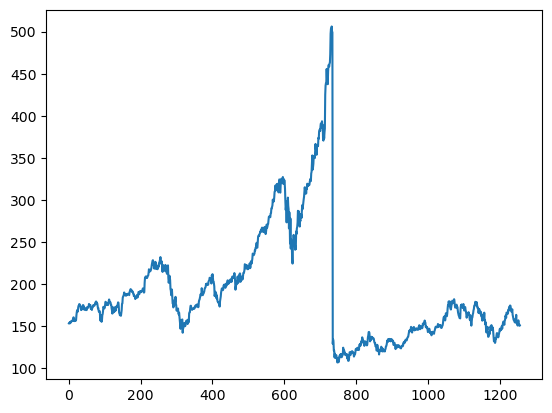

In [8]:
#Lets plot the closing stock data -
plt.plot(df1)

In [9]:
# Lets Scale the data for better results by using MinMax Scaler (LSTM are sensitive to the scale of the data) -
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.1163181 ],
       [0.11842204],
       [0.11764559],
       ...,
       [0.11496556],
       [0.10917971],
       [0.11003131]])

In [10]:
# Split the data in train_test_split parts -
training_size=int(len(df1)*0.65)  #Training size = 65%
test_size=len(df1)-training_size  #test size = 35%
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(817, 440)

In [12]:
train_data

array([[1.16318096e-01],
       [1.18422041e-01],
       [1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],
       [1.21377583e-01],
       [1.22730119e-01],
       [1.22880401e-01],
       [1.24508453e-01],
       [1.23130870e-01],
       [1.25610520e-01],
       [1.32849092e-01],
       [1.34326863e-01],
       [1.32548528e-01],
       [1.23080776e-01],
       [1.23757044e-01],
       [1.23556669e-01],
       [1.25886036e-01],
       [1.24157796e-01],
       [1.26662492e-01],
       [1.40788979e-01],
       [1.49981215e-01],
       [1.55792110e-01],
       [1.50407013e-01],
       [1.53462743e-01],
       [1.64458359e-01],
       [1.68841578e-01],
       [1.70244208e-01],
       [1.73825924e-01],
       [1.72924233e-01],
       [1.69893550e-01],
       [1.68140263e-01],
       [1.61552912e-01],
       [1.55892298e-01],
       [1.60951785e-01],
       [1.58572323e-01],
       [1.58146525e-01],
       [1.66061365e-01],
       [1.70619912e-01],


In [13]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4 i.e- We are taking previous 100 days data to predict day-101 stock close price -
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(716, 100)
(716,)
(339, 100)
(339,)


In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM - Converting 2D to 3D data -
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print(X_train.shape)
print(X_test.shape)

(716, 100, 1)
(339, 100, 1)


In [17]:
# Create the Stacked LSTM model -
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
12/12 [==============================] - 20s 762ms/step - loss: 0.0441 - val_loss: 0.0029
Epoch 2/30
12/12 [==============================] - 7s 582ms/step - loss: 0.0165 - val_loss: 0.0077
Epoch 3/30
12/12 [==============================] - 7s 554ms/step - loss: 0.0121 - val_loss: 4.4376e-04
Epoch 4/30
12/12 [==============================] - 4s 330ms/step - loss: 0.0108 - val_loss: 6.8824e-04
Epoch 5/30
12/12 [==============================] - 6s 466ms/step - loss: 0.0092 - val_loss: 0.0010
Epoch 6/30
12/12 [==============================] - 6s 528ms/step - loss: 0.0080 - val_loss: 6.0831e-04
Epoch 7/30
12/12 [==============================] - 5s 393ms/step - loss: 0.0086 - val_loss: 3.2275e-04
Epoch 8/30
12/12 [==============================] - 6s 508ms/step - loss: 0.0075 - val_loss: 7.5053e-04
Epoch 9/30
12/12 [==============================] - 6s 482ms/step - loss: 0.0062 - val_loss: 3.1380e-04
Epoch 10/30
12/12 [==============================] - 5s 401ms/step - loss: 

In [21]:
# Lets Do the prediction and check performance metrics -
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict

11/11 [==============================] - 1s 77ms/step


array([[ 1.46838754e-01],
       [ 1.50895923e-01],
       [ 1.55241400e-01],
       [ 1.59932539e-01],
       [ 1.64784148e-01],
       [ 1.69550821e-01],
       [ 1.73784822e-01],
       [ 1.77345172e-01],
       [ 1.80210307e-01],
       [ 1.82380587e-01],
       [ 1.83774918e-01],
       [ 1.84575632e-01],
       [ 1.85143396e-01],
       [ 1.85772315e-01],
       [ 1.86424494e-01],
       [ 1.86946303e-01],
       [ 1.87288061e-01],
       [ 1.87390834e-01],
       [ 1.87055975e-01],
       [ 1.86274379e-01],
       [ 1.84832945e-01],
       [ 1.82614386e-01],
       [ 1.79469824e-01],
       [ 1.76153392e-01],
       [ 1.72766283e-01],
       [ 1.69345126e-01],
       [ 1.66104868e-01],
       [ 1.63119152e-01],
       [ 1.60589218e-01],
       [ 1.58825785e-01],
       [ 1.57974824e-01],
       [ 1.57676324e-01],
       [ 1.57826468e-01],
       [ 1.58529401e-01],
       [ 1.59670487e-01],
       [ 1.61231086e-01],
       [ 1.63141012e-01],
       [ 1.65347293e-01],
       [ 1.6

In [22]:
##Transformback to original form - (Reversed Scaling)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
train_predict

array([[165.46538 ],
       [167.0852  ],
       [168.82013 ],
       [170.69307 ],
       [172.63007 ],
       [174.53316 ],
       [176.22359 ],
       [177.64505 ],
       [178.78896 ],
       [179.65546 ],
       [180.21214 ],
       [180.53181 ],
       [180.7585  ],
       [181.0096  ],
       [181.26997 ],
       [181.47832 ],
       [181.61476 ],
       [181.65579 ],
       [181.5221  ],
       [181.21005 ],
       [180.63455 ],
       [179.7488  ],
       [178.49333 ],
       [177.16925 ],
       [175.81694 ],
       [174.45103 ],
       [173.15736 ],
       [171.96532 ],
       [170.95525 ],
       [170.25119 ],
       [169.91144 ],
       [169.79227 ],
       [169.85222 ],
       [170.13286 ],
       [170.58844 ],
       [171.2115  ],
       [171.97404 ],
       [172.8549  ],
       [173.87338 ],
       [174.97826 ],
       [175.96008 ],
       [176.51741 ],
       [176.5575  ],
       [176.04947 ],
       [175.10054 ],
       [173.86693 ],
       [172.44052 ],
       [171.0

In [23]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

237.30382840739765

In [24]:
### Test Data RMSE -
math.sqrt(mean_squared_error(y_test,test_predict))

156.87233345448456

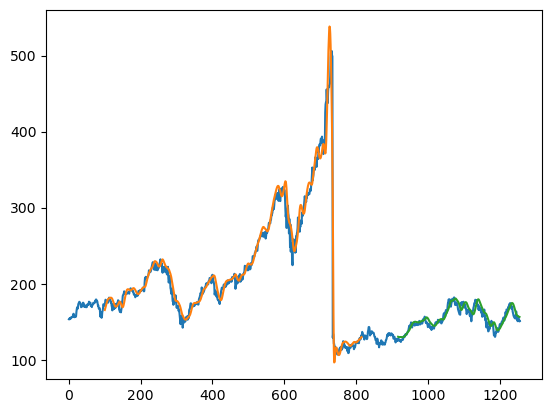

In [25]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test_data) 

440

In [27]:
#Lets pickup previous 100 days data to predict next 30 days stock data -
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0843581715716969,
 0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.09653099561678141,
 0.09843456480901686,
 0.10487163431433938,
 0.10299311208515965,
 0.0896681277395115,
 0.07586725109580456,
 0.0627175954915466,
 0.06492172824045078,
 0.07160926737633061,
 0.05815904821540385,
 0.061916092673763246,
 0.0727113337507827,
 0.07140889167188474,
 0.07872260488415778,
 0.08721352536005006,
 0.08721352536005006,
 0.07664370695053219,
 0.08112711333750777,
 0.07484032561051968,
 0.08037570444583592,
 0.08696305572949276,
 0.09036944270507191,
 0.09896055103318718,
 0.10068879148403248,
 0.09525360050

In [29]:
# demonstrate prediction for next 30 days - Stock Forcasting for Next 30 Days -
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.12290542]
101
1 day input [0.12505949 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775
 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941
 0.09084534 0.08395742 0.08435817 0.09252348 0.107201   0.10519724
 0.10487163 0.11113338 0.096531   0.09843456 0.10487163 0.10299311
 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905
 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353
 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944
 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051
 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469
 0.11549155 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175
 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753 0.14547276
 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299
 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176
 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498
 0.11944897 0.12303068 0.11927364 

In [30]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
len(df1)

1257

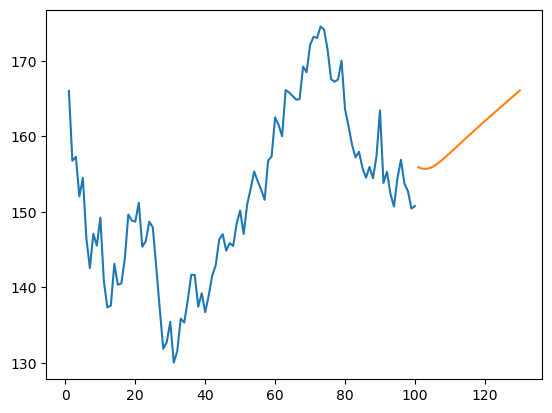

In [31]:
#Lets plot previous 100 days data and New predicted 30 days data -
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

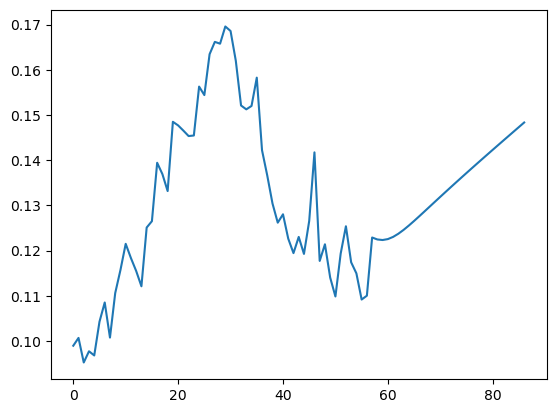

In [32]:
#Lets combine both 100 days and next 30 days output in a single line -
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

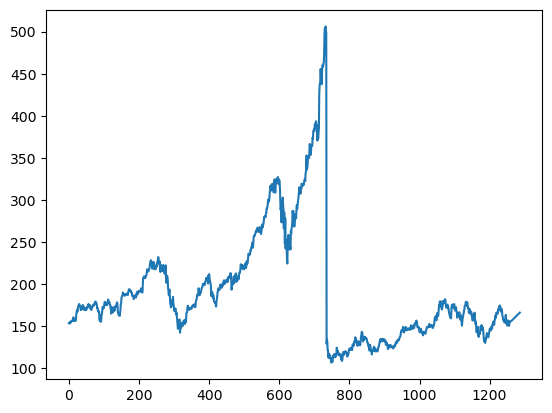

In [33]:
#Lets plot hole data with New predicted data of 30 days -
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [ ]:
#Next 30 Days APPLEs stock close price values -
Future = day_pred,scaler.inverse_transform(lst_output)
Future

In [ ]:
#You can improve accuracy of this model by 1- taking time stamp as high as possible,
#Or can use Bidirectional LSTM insted of Stacked LSTM